In [ ]:
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import numpy as np
from keras.models import load_model
from copy import deepcopy

Using TensorFlow backend.


In [ ]:
path_portraits = '/content/drive/My Drive/Licenta/portraits_celeba/'
# path_portraits = ''
path_archives = path_portraits + 'dataset/dataset_arrays_archives/'
# path_archives = 'archives/'
path_mr = path_portraits + 'models+results/'
path_cleancode = path_mr + 'cleancode/'
path_autoencoder = path_cleancode + 'autoencoder/'
path_gan = path_cleancode + 'gan/'

In [ ]:
def path_models_results_autoenc(model_index):
  path = ''
  if model_index == 3:
    path = 'skip_false_Conv2DTranspose/'
  elif model_index == 4:
    path = 'skip_false_UpSampling2D/'
  elif model_index == 1:
    path = 'skip_true_Conv2DTranspose/'
  elif model_index == 2:
    path = 'skip_true_UpSampling2D/'
  path = path_autoencoder + path
  return path

In [ ]:
def path_models_results_gan(model_index):
  model_index = int(model_index)
  path = ''
  if model_index == 11:
    path = '11_skipTrue_conv2D_basic_-_0.5_20,80/'
  elif model_index == 12:
    path = '12_skipTrue_conv2D_convo_4_0.5_20,80/'
  elif int(model_index // 10) == 13 or model_index == 13: 
    path = '13_skipTrue_conv2D_convo_8_0.5_20,80/'
  elif model_index == 21:
    path = '21_skipTrue_upsample2D_basic_-_0.5_20,80/'
  elif model_index == 22:
    path = '22_skipTrue_upsample2D_convo_4_0.5_20,80/'
  elif model_index == 23:
    path = '23_skipTrue_upsample2D_convo_8_0.5_20,80/'
  elif model_index == 31:
    path = '31_skipFalse_conv2D_basic_-_0.5_20,80/'
  elif model_index == 32:
    path = '32_skipFalse_conv2D_convo_4_0.5_20,80/'
  elif model_index == 33:
    path = '33_skipFalse_conv2D_convo_8_0.5_20,80/'
  elif model_index == 41:
    path = '41_skipFalse_upsample2D_basic_-_0.5_20,80/'
  elif model_index == 42:
    path = '42_skipFalse_upsample2D_convo_4_0.5_20,80/'
  elif model_index == 43:
    path = '43_skipFalse_upsample2D_convo_8_0.5_20,80/'
  path = path_gan + path
  return path

Autoencoder

In [ ]:
model_index_ae = 1
train_number_ae = '1'
path_architecture_ae = path_models_results_autoenc(model_index_ae)
path_models_ae = path_architecture_ae + 'models' + train_number_ae + '/'
path_model_ae = path_models_ae + 'weights.100-0.00.h5'
path_results_ae = path_architecture_ae + 'results' + train_number_ae + 'diff/'

In [ ]:
x_test_paths = ['x_test_2.npz', 'x_test_3.npz', 'x_test_4.npz']
y_test_paths = ['y_test_2.npz', 'y_test_3.npz', 'y_test_4.npz']
x_test_arrays = []
y_test_arrays = []

for xp in x_test_paths:
  x_test = np.load(path_archives + xp)
  x_test = x_test['x_test']/255
  x_test_arrays.append(x_test)

for yp in y_test_paths:
  y_test = np.load(path_archives + yp)
  y_test = y_test['y_test']/255
  y_test_arrays.append(y_test)

In [ ]:
autoenc = load_model(path_model_ae)

In [ ]:
y_preds_ae = []
for xt in x_test_arrays:
  y_pred_ae = autoenc.predict(xt)
  y_preds_ae.append(y_pred_ae)

(216, 176)


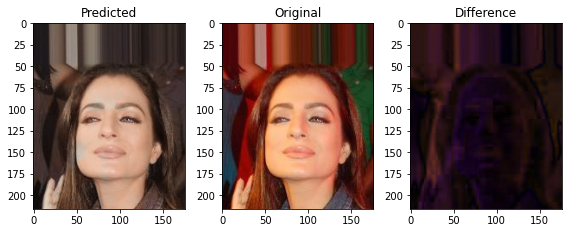

8828.008222821189


In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(8, 4))
ax = axes.ravel()
bw = deepcopy(x_test_arrays[2][56])
bw = np.squeeze(bw, axis=2)
print(bw.shape)
ax[0].imshow(y_preds_ae[0][0])
ax[0].set_title("Predicted")
ax[1].imshow(y_test_arrays[0][0])
ax[1].set_title("Original")
ax[2].imshow(np.abs(y_preds_ae[0][0] - y_test_arrays[0][0]))
ax[2].set_title("Difference")

fig.tight_layout()

plt.show()
print(np.sum(np.abs(y_preds_ae[0][0] - y_test_arrays[0][0])))

In [ ]:
diff_arrays_ae = []
diffs_ae = []

for j, y_pred_ae in enumerate(y_preds_ae):
  for i, y in enumerate(y_pred_ae):
    diff_array_ae = np.abs(y_test_arrays[j][i]-y_pred_ae[i])
    diff_arrays_ae.append(diff_array_ae)
    diff_ae = np.sum(diff_array_ae)
    diffs_ae.append(diff_ae)

In [ ]:
# calculate per_pixel_diff_means (diferenta medie a unui pixel, calculata pe fiecare imagine)
nr_pixels = 216*176*3
per_pixel_diff_means_ae = []
for diff in diffs_ae:
  per_pixel_diff_means_ae.append(diff/nr_pixels)

In [ ]:
print('minim:', np.min(per_pixel_diff_means_ae), 'medie:', np.mean(per_pixel_diff_means_ae), 'maxim:', np.max(per_pixel_diff_means_ae))

minim: 0.009202712768657507 medie: 0.03779716072094678 maxim: 0.1611610548083516


In [ ]:
# diferenta medie pe setul de portrete cu autoencoder, pe o imagine
np.mean(diffs_ae)/1000

4.310690585578411

In [ ]:
diffs_ae[10]

4657.46000060743

GAN

In [ ]:
model_index_g = 13
train_number_g = '1'
path_architecture_g = path_models_results_gan(model_index_g)
path_models_g = path_architecture_g + 'models' + train_number_g + '/'
path_model_g = path_models_g + 'gener_ep11.0.h5'
path_results_g = path_architecture_g + 'results' + train_number_g + '/'

In [ ]:
generator = load_model(path_model_g)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [ ]:
y_preds_g = []
for xt in x_test_arrays:
  y_pred_g = generator.predict(xt)
  y_preds_g.append(y_pred_g)

In [ ]:
diff_arrays_g = []
diffs_g = []

for j, y_pred_g in enumerate(y_preds_g):
  for i, y in enumerate(y_pred_g):
    diff_array_g = np.abs(y_test_arrays[j][i]-y_pred_g[i])
    diff_arrays_g.append(diff_array_g)
    diff_g = np.sum(diff_array_g)
    diffs_g.append(diff_g)

In [ ]:
# calculate per_pixel_diff_means (diferenta medie a unui pixel, calculata pe fiecare imagine)
nr_pixels = 216*176*3
per_pixel_diff_means_g = []
for diff in diffs_g:
  per_pixel_diff_means_g.append(diff/nr_pixels)

In [ ]:
print('minim:', np.min(per_pixel_diff_means_g), 'medie:', np.mean(per_pixel_diff_means_g), 'maxim:', np.max(per_pixel_diff_means_g))

minim: 0.011002422236328652 medie: 0.042334731924322445 maxim: 0.17309527522265503


In [ ]:
# diferenta medie pe setul de portrete cu gan
np.mean(diffs_g)/1000

4.82795729964146

In [ ]:
diffs_g[10]

4692.129993506047

Predict and save images

In [ ]:
model_index_g = 13
train_number_g = '6'
path_architecture_g = path_models_results_gan(model_index_g)
path_models_g = path_architecture_g + 'models' + train_number_g + '_133/'
path_model_g = path_models_g + 'gener_ep7.h5'
path_results_g = path_architecture_g + 'results' + train_number_g + '_133/'

In [ ]:
generator = load_model(path_model_g)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [ ]:
x_test = np.load(path_archives + 'x_test_2.npz')
x_test = x_test['x_test']/255

In [ ]:
y_pred = generator.predict(x_test)

In [ ]:
y_pred = y_pred * 255

for i, y in enumerate(y_pred):
    img = Image.fromarray(y.astype(np.uint8))
    img.save(path_results_g + '{}.jpg'.format(i))